In [8]:
import numpy as np

import matplotlib.pyplot as plt
import scipy # contains an image of a racoon!
from PIL import Image # for reading image files
from scipy.stats import mode
import cv2 as cv

grey_vals = np.array([0.2126, 0.7152, 0.0722])

In [9]:
file_name = 'static/images/topartists.png'

my_img = Image.open(file_name)
img_array = np.array(my_img)
#print(img_array.shape)
img_array




array([[[191, 104,  24],
        [191, 104,  24],
        [191, 104,  24],
        ...,
        [191, 104,  24],
        [191, 104,  24],
        [191, 104,  24]],

       [[192, 105,  24],
        [192, 105,  24],
        [192, 105,  24],
        ...,
        [192, 105,  24],
        [192, 105,  24],
        [192, 105,  24]],

       [[194, 106,  24],
        [194, 106,  24],
        [194, 106,  24],
        ...,
        [194, 106,  24],
        [194, 106,  24],
        [194, 106,  24]],

       ...,

       [[255, 139,  31],
        [255, 139,  31],
        [255, 139,  31],
        ...,
        [255, 139,  31],
        [255, 139,  31],
        [255, 139,  31]],

       [[255, 139,  31],
        [255, 139,  31],
        [255, 139,  31],
        ...,
        [255, 139,  31],
        [255, 139,  31],
        [255, 139,  31]],

       [[255, 139,  31],
        [255, 139,  31],
        [255, 139,  31],
        ...,
        [255, 139,  31],
        [255, 139,  31],
        [255, 139,  31]]

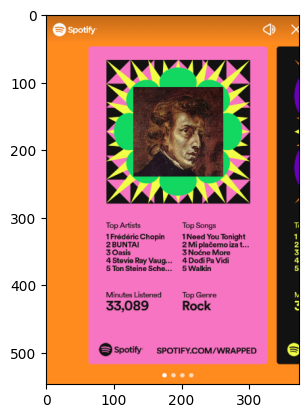

In [10]:
plt.imshow(img_array)

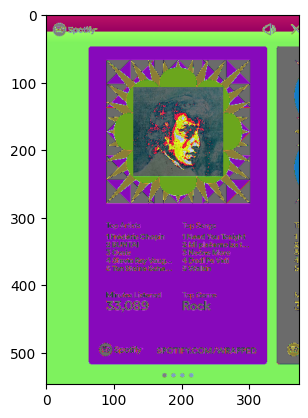

In [11]:
plt.imshow(125-img_array)

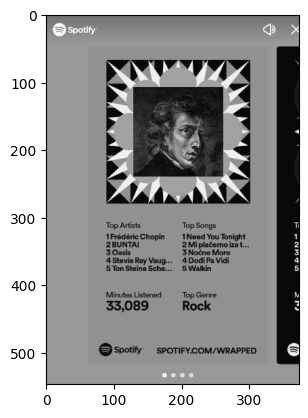

In [12]:
pic_divided = img_array /255
graymacs = pic_divided @ grey_vals

plt.imshow(graymacs,cmap='gray')

In [13]:
#Tryogn to get the rgb values
#axis = 0
#u, indices = np.unique(img_array, return_inverse=True)
#u[np.argmax(np.apply_along_axis(np.bincount, axis, indices.reshape(img_array.shape),
#                                None, np.max(indices) + 1), axis=axis)]

#This turns it into a two dimensional array with only rgb values
rgbvalues = img_array.reshape(-1, 3)
#print(img_array.shape)
unique, counts = np.unique(img_array.reshape(-1, 3), axis=0, return_counts=True)

#print(unique.shape)
#print(counts.shape)



In [14]:
#print(mode(img_array, axis=0, keepdims=True))


#print(unique)
#print(counts)

img_array[:,:,0], img_array[:,:,1], img_array[:,:,2] = unique[np.argmax(counts)]
unique[np.argsort(counts)][-10:]


#This one also works but its counting ascending,least common to most in the top 10

array([[242, 132,  30],
       [106,   0, 186],
       [ 44,  31,  20],
       [253, 138,  31],
       [254, 137,  49],
       [242, 255,  71],
       [ 18, 215,  96],
       [ 18,  18,  18],
       [255, 139,  31],
       [246, 116, 194]], dtype=uint8)

In [15]:
#This one works

sorted_indices = np.argsort(counts)[::-1]
sorted_unique = unique[sorted_indices]
top_10_unique = sorted_unique[:10]
top_10_unique

array([[246, 116, 194],
       [255, 139,  31],
       [ 18,  18,  18],
       [ 18, 215,  96],
       [242, 255,  71],
       [254, 137,  49],
       [253, 138,  31],
       [ 44,  31,  20],
       [106,   0, 186],
       [242, 132,  30]], dtype=uint8)

In [17]:
# Load the image into a NumPy array
img = Image.open('static/images/topartists.png')
img_array = np.array(img)

# Flatten the image array to a 1D array
flat_array = img_array.reshape(-1, 3)

# Find the unique elements and their counts
unique, counts = np.unique(flat_array, axis=0, return_counts=True)

# Sort the counts array in descending order and get the sorted indices
sorted_indices = np.argsort(counts)[::-1]

# Sort the unique elements array using the sorted indices
sorted_unique = unique[sorted_indices]

# Calculate the percentage of each color
total_pixels = flat_array.shape[0]
percentages = counts[sorted_indices] / total_pixels * 100

# Select the top 10 elements
top_10_colors = sorted_unique[:10]
top_10_percentages = percentages[:10]

# Print the RGB values and percentages of the top 10 colors
for color, percentage in zip(top_10_colors, top_10_percentages):
    print(f'Color: {color}, Percentage: {percentage:.2f}%')

Color: [246 116 194], Percentage: 35.23%
Color: [255 139  31], Percentage: 23.28%
Color: [18 18 18], Percentage: 10.66%
Color: [ 18 215  96], Percentage: 3.36%
Color: [242 255  71], Percentage: 2.12%
Color: [254 137  49], Percentage: 0.45%
Color: [253 138  31], Percentage: 0.41%
Color: [44 31 20], Percentage: 0.23%
Color: [106   0 186], Percentage: 0.19%
Color: [242 132  30], Percentage: 0.18%


In [ ]:
percentages

array([3.52281281e+01, 2.32771852e+01, 1.06575487e+01, ...,
       4.88811114e-04, 4.88811114e-04, 4.88811114e-04])

In [35]:
#Let's see why this does not work
# Load the image into a NumPy array
img = Image.open('static\images\gigachad.png')
img_array = np.array(img)


img_array = img_array[:, :, :3]

# Flatten the image array to a 1D array
flat_array = img_array.reshape(-1, 3)
unique, counts = np.unique(flat_array, axis=0, return_counts=True)

# Sort the counts array in descending order and get the sorted indices
sorted_indices = np.argsort(counts)[::-1]

# Sort the unique elements array using the sorted indices
sorted_unique = unique[sorted_indices]

# Calculate the percentage of each color
total_pixels = flat_array.shape[0]
percentages = counts[sorted_indices] / total_pixels * 100

# Select the top 10 elements
top_10_colors = sorted_unique[:10]
top_10_percentages = percentages[:10]

# Print the RGB values and percentages of the top 10 colors
for color, percentage in zip(top_10_colors, top_10_percentages):
    print(f'Color: {color}, Percentage: {percentage:.2f}%')


Color: [97 97 97], Percentage: 2.96%
Color: [118 118 118], Percentage: 2.18%
Color: [104 104 104], Percentage: 2.00%
Color: [87 87 87], Percentage: 1.91%
Color: [111 111 111], Percentage: 1.82%
Color: [98 98 98], Percentage: 1.78%
Color: [86 86 86], Percentage: 1.73%
Color: [109 109 109], Percentage: 1.65%
Color: [84 84 84], Percentage: 1.52%
Color: [107 107 107], Percentage: 1.50%
